## Experimento 9 — Naive Bayes (Classificação)
**Objetivo:** treinar um classificador simples e avaliar acurácia.

**Enunciado:**  
1. Carregue o **Iris**. Separe treino/teste (80/20).  
2. Treine **Gaussian Naive Bayes** e avalie **acurácia**.  
3. **Tarefa Extra:** use **apenas 2 features** e **visualize a fronteira de decisão** em 2D com `contourf` + `scatter`.


[![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/flavioluizseixas/aprendizado-de-maquina-na-saude/blob/main/0-Nivelamento/Experimento_09.ipynb)

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn (para os experimentos de ML)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Opção para gráficos inline (no Jupyter/Colab)
# %matplotlib inline  # Descomente no Jupyter clássico se necessário

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [4]:
# Código-base
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Acurácia (Naive Bayes): {acc:.3f}")


Acurácia (Naive Bayes): 0.967


### Adaptação (Extra)
- Escolha duas colunas (ex.: 0 e 2).  
- Gere uma malha de pontos (`np.meshgrid`) no espaço 2D.  
- Classifique a malha e plote `contourf` da decisão + `scatter` dos dados reais.


Acurácia (Naive Bayes, 2 features): 0.900


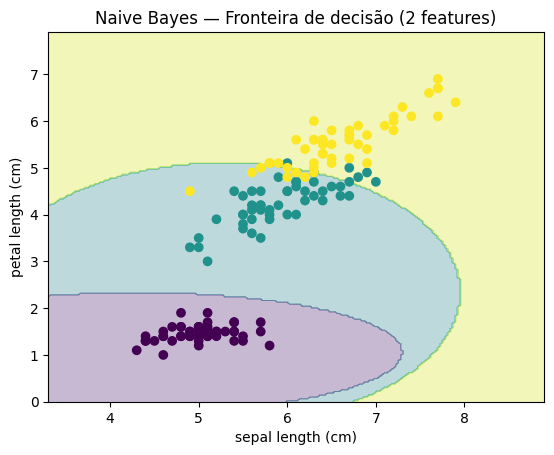

In [5]:
# Código final (com Extra - 2 features + fronteira de decisão)
iris = load_iris()
X = iris.data[:, [0, 2]]  # sepal length (cm) e petal length (cm)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

clf = GaussianNB()
clf.fit(X_train, y_train)

# Avaliação
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Acurácia (Naive Bayes, 2 features): {acc:.3f}")

# Fronteira de decisão
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("Naive Bayes — Fronteira de decisão (2 features)")
plt.show()


## Experimento 10 — Comparando Modelos (NB, SVM, KNN)
**Objetivo:** comparar modelos simples em um dataset clássico.

**Enunciado:**  
1. Use o **Iris**. Compare **GaussianNB**, **SVM** (linear) e **KNN** (k=5).  
2. Reporte **acurácia**.  
3. **Tarefa Extra:** compare diferentes **proporções de teste** (20%, 30%, 40%) e observe o impacto nas métricas.
> Dica: para SVM e KNN, utilize `Pipeline(StandardScaler() -> Modelo)` para evitar *data leakage*.


In [ ]:
# Código-base (comparação simples)
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

models = {
    "NaiveBayes": GaussianNB(),
    "SVM_linear": Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="linear", random_state=RANDOM_STATE))]),
    "KNN_k5": Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: acc = {acc:.3f}")


### Adaptação (Extra)
- Varie `test_size` em `[0.2, 0.3, 0.4]` e repita a comparação.
- Use `stratify=y` para manter a proporção entre classes.


In [ ]:
# Código final (com Extra - variação de test_size)
iris = load_iris()
X = iris.data
y = iris.target

def evaluate_split(test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=RANDOM_STATE, stratify=y
    )
    models = {
        "NaiveBayes": GaussianNB(),
        "SVM_linear": Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="linear", random_state=RANDOM_STATE))]),
        "KNN_k5": Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
    }
    print(f"\n=== test_size = {test_size:.1f} ===")
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"{name}: acc = {acc:.3f}")

for ts in [0.2, 0.3, 0.4]:
    evaluate_split(ts)
